In [101]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [142]:
class GridBoard:
    def __init__(self, cols, rows):
        self.rows = rows
        self.cols = cols
        #self.rewards = pd.DataFrame(np.zeros((rows, cols)))
        self.rewards = pd.DataFrame([[-1 for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))
        self.walls = []
        for w in self.walls:
        # check here to see if walls within the dataframe boundaries
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                    self.show_board[w[0]][w[1]] = "X"

        self.terminals = []  
        
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))

        self.prevq = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # q_table of the ground truth when q-values converge
        self.qtruth = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

        # v table of where the ground truth of v values converage
        self.vtruth = pd.DataFrame(np.zeros((self.rows, self.cols)))
        self.prevv = pd.DataFrame(np.zeros((self.rows, self.cols)))

        self.key = []
        self.door = []
    
    def assignRewards(self, row, col, reward):
        self.rewards[row][col] = reward
    
    def assignTerminals(self, row, col):
        self.terminals.append([row, col])
    
    def reset_showboard(self):
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))
        for w in self.walls:
            if w[0] > -1 and w[0] < grid.cols:
                if w[1] > -1 and w[1] < grid.rows:
                        self.show_board[w[0]][w[1]] = "X"
    
    def set_walls(self, walls):
        for w in walls:
            self.walls.append(w)
    
    def determineQtruth(self, iters, vBool, take1k, alg):
        for i in range(0, len(iters)):
            if alg != 'sarsa':
                run(False, iters[i], None, 1, True, 'ql') 
            else:
                run(False, iters[i], None, 0.1, True, 'sarsa') 

            if take1k == True:
                if iters[i] == 1000:
                    print(vBool)
                    self.qtruth = player.qtable[:]

                    if vBool == True:
                            print("in there")
                            for i in range(0, len(player.qtable.columns)):
                                for j in range(0, len(player.qtable.index)):                    
                                    v = max(player.qtable[i][j])
                                    self.vtruth[i][j] = v
                    return iters
                
            if i > 0:        
                diffdf = pd.DataFrame([[[0, 0, 0, 0] for j in range(self.cols)] for i in range(self.rows)], index=range(self.rows), columns=range(self.cols))

                for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            diffdf[c][r][l] = round(player.qtable[c][r][l] - self.prevq[c][r][l],2)
                #print(player.qtable)
                #print(diffdf)

                # get sum of differences
                sumDiff = 0
                for c in range(0, len(diffdf.columns)):
                    for r in range(0, len(diffdf.index)):
                        for l in range(0, 4):  
                            sumDiff += abs(diffdf[c][r][l])
                            #print(f"value is {abs(diffdf[c][r][l])}")
                            #print(f"sumDiff is {sumDiff}")
                
                print(f"Diff is {sumDiff}")


                #if self.qtruth.equals(diffdf) or sumDiff < 10.0:
                if sumDiff < 10.0:
                    print("CONVERGENCE!!!")              
                    self.qtruth = player.qtable[:]

                    if vBool == True:
                        print("in there")
                        for i in range(0, len(player.qtable.columns)):
                            for j in range(0, len(player.qtable.index)):                    
                                v = max(player.qtable[i][j])
                                self.vtruth[i][j] = v

                    return(iters)
                
            
            for c in range(0, len(player.qtable.columns)):
                    for r in range(0, len(player.qtable.index)):
                        for l in range(0, 4):   
                            self.prevq[c][r][l] = player.qtable[c][r][l]
            



In [3]:
class Player:
    def __init__(self, grid, start):
        self.start = start
        self.curr_state = self.start[:]
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = "*"
        self.policy = pd.DataFrame(0, index=range(0,grid.rows), columns=range(0,grid.cols))
        self.v = pd.DataFrame(np.zeros((grid.rows, grid.cols)))
        self.vtable = pd.DataFrame(np.zeros((grid.rows, grid.cols)))

        # q_tables are a list within a dataframe cell with the directions [North, East, South, West], always start at 0
        self.qtable = pd.DataFrame([[[0, 0, 0, 0] for j in range(grid.cols)] for i in range(grid.rows)], index=range(grid.rows), columns=range(grid.cols))

        self.gotkey = False
        self.gotdoor = False


    
    def move(self, direct):
        # determine if a move can occur
        # possible values for act: N, S, E, W
        # need next_state to find walls

        if direct == 'N':
            next_state = [self.curr_state[0], self.curr_state[1]-1]
            if self.curr_state[1] != 0 and next_state not in grid.walls: self.curr_state[1] -= 1 

        elif direct == 'E':
            next_state = [self.curr_state[0]+1, self.curr_state[1]]
            if next_state[0] < grid.cols and next_state not in grid.walls: self.curr_state[0] += 1 

        elif direct == 'S':
            next_state = [self.curr_state[0], self.curr_state[1]+1]
            if next_state[1] < grid.rows and next_state not in grid.walls: self.curr_state[1] += 1 

        elif direct == 'W':
            next_state = [self.curr_state[0]-1, self.curr_state[1]]
            if self.curr_state[0] != 0 and next_state not in grid.walls: self.curr_state[0] -= 1 

        else:
            print("Invalid option")

        grid.reset_showboard()
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = '*'
    
    def detNextState(self, curr_state, direct):

        if direct == 'N': next_state = [self.curr_state[0], self.curr_state[1]-1]
        elif direct == 'E': next_state = [self.curr_state[0]+1, self.curr_state[1]]
        elif direct == 'S': next_state = [self.curr_state[0], self.curr_state[1]+1]
        elif direct == 'W': next_state = [self.curr_state[0]-1, self.curr_state[1]]
        else: print("Invalid option")
        
        return next_state    
    
    def findRandDirection(self):
        d = random.randint(1,4)
        if d == 1: return 'N'
        elif d == 2: return 'E'
        elif d == 3: return 'S'
        elif d == 4: return 'W'
        else:
            print("out of bounds")
        
    def detPolicyV(self):
        # determine policy & V table
        for i in range(0, len(player.policy.columns)):
            for j in range(0, len(player.policy.index)):
                dir = player.qtable[i][j].index(max(player.qtable[i][j]))         
                dirv = getDirChar(dir)
                player.policy[i][j] = dirv
                
                v = max(player.qtable[i][j])
                player.v[i][j] = v
            


In [70]:
class QLearn:
    def __init__(self, gamma, lr, deterministic):
        self.gamma = gamma
        self.deterministic = deterministic
        self.sarNextDir = 1
        if not deterministic:
            self.lr = lr
        else:
            self.lr = 1
    
    def findQhat(self, rewards, qtable, cs, ns, d):
        qhat = 0
        if self.deterministic == True:
            if ns not in grid.walls:
                qhat = rewards[ns[0]][ns[1]] + self.gamma * max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3])
        else:
            if ns not in grid.walls:
                qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + \
                    self.lr * (rewards[ns[0]][ns[1]] + self.gamma * \
                    max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3]))

        return qhat
    
    def findSarsa(self, rewards, qtable, cs, ns, d, eps):
        x = ns[0]
        y = ns[1]
        # difference with Sarsa is it follows a policy premade
        qhat = 0

        # get next action for sarsa
        p = np.random.random()
        if p < (1-eps):
            #if ns not in grid.walls:
            # Greedy Option
            nextDir = np.argmax(player.qtable[ player.curr_state[0] ][ player.curr_state[1] ] )
            #else:
            #    nextDir = getDirInt(player.findRandDirection())
        else: # random
            nextDir = getDirInt(player.findRandDirection())
        
        self.sarNextDir = nextDir
        #print(nextDir)
        #print(player.policy)       
        

        if ns not in grid.walls:
            qhat = (qtable[cs[0]][cs[1]][d] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * qtable[ns[0]][ns[1]][nextDir] - qtable[cs[0]][cs[1]][d]))
            #qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + \
            #        self.lr * (rewards[ns[0]][ns[1]] + self.gamma * \
            #        qtable[ns[0]][ns[1]][nextDir] - qtable[cs[0]][cs[1]][d])
            
        return qhat

    def findV(self, rewards, qtable, cs, ns, d):
        # used for TD
        v = 0
        if ns not in grid.walls:
            nextDir = getDirInt(player.policy[ns[0]][ns[1]])
            v = player.vtable[cs[0]][cs[1]] + self.lr * (rewards[ns[0]][ns[1]] + self.gamma * (player.vtable[ns[0]][ns[1]] - player.vtable[cs[0]][cs[1]]))
            
        return v

In [5]:
class Charts():
    def __init__(self, episodes):
        self.stepsGoal = pd.DataFrame(0, columns=['Steps'], index=range(1, episodes+1))
        self.stepsGoal.index.name = 'Episodes'
        self.sse = pd.DataFrame(0, columns=['SSE'], index=range(1, episodes+1))

        self.stepsKey = pd.DataFrame(0, columns=['Key', 'Door', 'Goal'], index=range(1, episodes+1))

    
    def determineSSE(self, type):
        if type == 'q':
            truth = grid.qtruth
            pred = player.qtable
        else:
            truth = grid.vtruth
            pred = player.vtable

        truthList = []
        currentPred = []
        sseVal = 0

        # convert the DF of lists into a big list per DF
        for c in range(0, len(truth.columns)):
            for r in range(0, len(truth.index)):
                truthList.append(truth[c][r])

        for c in range(0, len(pred.columns)):
            for r in range(0, len(pred.index)):
                currentPred.append(pred[c][r])
            
        if type == 'q':
            truthList = [j for i in truthList for j in i]
            currentPred = [j for i in currentPred for j in i]


        for t in range(0, len(truthList)):
            sseVal += (truthList[t] - currentPred[t])**2
        
        return sseVal

In [6]:
# function to create gridboard, set up walls & boundaries and assign rewards
# recieves: columns, rows, arewards array for rewards
def setupGrid(columns, rows, arewards, aterminals, key, door):
    grid = GridBoard(columns, rows)
    grid.key = key
    grid.door = door
    
    # create walls and boundaries, treat out of bounds as walls
    for c in range(0, grid.cols):
        grid.walls.append([c, -1])
        grid.walls.append([c, grid.rows])
    for r in range(0, grid.rows):
        grid.walls.append([-1, r])
        grid.walls.append([grid.cols, r])

    for reward in arewards:
        grid.assignRewards(reward[0], reward[1], reward[2])
    
    for terminal in aterminals:
        grid.assignTerminals(terminal[0], terminal[1])

    return grid

In [7]:
def getDirInt(direct):
    d = 0
    if direct == 'N': d = 0
    elif direct == 'E': d = 1
    elif direct == 'S': d = 2
    elif direct == 'W': d = 3
    return d

def getDirChar(direct):
    d = ''
    if direct == 0: d = 'N'
    elif direct == 1: d = 'E'
    elif direct == 2: d = 'S'
    elif direct == 3: d = 'W'
    return d

In [140]:
# receives: pdef (if predefined path or not), iterations, path (none if not predefined)
def run(pdef, iters, path, eps, getQtruth, alg):
   
    if pdef == False:
        for i in range(0, iters):
            stepCount = 0
            stepsToKey = 0
            stepsToDoor = 0
            stepsToGoal = 0
            while player.curr_state not in grid.terminals:
                x = player.curr_state[0]
                y = player.curr_state[1]

                p = np.random.random()                

                if alg == 'td':
                    if p < (1-eps):
                        direct = player.policy[x][y]
                    else: # random
                        direct = player.findRandDirection()                
                elif alg == 'sarsa':
                    if p < (1-eps):
                        direct = getDirChar(qlearn.sarNextDir)     
                    else:
                        direct = player.findRandDirection()                 
                else:                        
                    if p < (1-eps):
                        direct = getDirChar(np.argmax(player.qtable[ player.curr_state[0] ][ player.curr_state[1] ] ))
                    else: # random
                        direct = player.findRandDirection()   
                    
                d = getDirInt(direct)

                next_state = player.detNextState(player.curr_state, direct)
                

                if alg == 'ql':
                    qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'sarsa':
                    qhat = qlearn.findSarsa(grid.rewards, player.qtable, player.curr_state, next_state, d, eps)
                    qhat = round(qhat, 2)
                    player.qtable[x][y][d] = qhat
                elif alg == 'td':
                    vhat = qlearn.findV(grid.rewards, player.qtable, player.curr_state, next_state, d)
                    vhat = round(vhat, 2)
                    player.vtable[x][y] = vhat                 

                player.move(direct)
                stepCount += 1    

                    
                if player.curr_state == grid.key:
                    player.gotkey = True
                    if grid.door in grid.walls:
                        grid.walls.remove(grid.door)  
                
                if player.curr_state == grid.door:
                    player.gotdoor = True

                if getQtruth == False:
                    # update the steps goal df
                    charts.stepsGoal['Steps'][i+1] = stepCount
                    if player.gotkey == False:                      
                        stepsToKey += 1

                    if player.gotdoor == False:                      
                        stepsToDoor += 1


            if getQtruth == False:
                # get SSE
                if alg == 'td':
                    charts.sse['SSE'][i+1] = charts.determineSSE('v')
                else:
                    charts.sse['SSE'][i+1] = charts.determineSSE('q')

                charts.stepsKey['Key'][i+1] = stepsToKey
                trueStepsToDoor = stepsToDoor - stepsToKey
                charts.stepsKey['Door'][i+1] = trueStepsToDoor
                charts.stepsKey['Goal'][i+1] = stepCount - (trueStepsToDoor + stepsToKey) 


            # move player back to start position
            player.curr_state = player.start[:]
            # reset door
            if grid.door is not None:
                grid.walls.append(grid.door)
                player.gotkey = False
                player.gotdoor = False

            if i % 10 == 0:
                print(i, end=' ')

        player.qtable = player.qtable.round(2)
        player.vtable = player.vtable.round(2)               

    
    else:   
        for t in path:            
            for direct in t:
                x = player.curr_state[0]
                y = player.curr_state[1]

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)

                qhat = round(qhat, 2)

                player.qtable[x][y][d] = qhat

                player.move(direct)

            player.curr_state = player.start[:]

        player.qtable = player.qtable.round(2)

In [172]:
# Non-deterministic Homework example
aRewards = [[0, 2, 25], [1, 2, -100], [1, 0, -80], [2, 2, 80], [2, 0, 100]]
aTerminals = [[0, 2], [1, 2], [1, 0], [2, 2], [2, 0]]

grid = setupGrid(3, 3, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.5, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False, 'ql')

grid.reset_showboard()

player = Player(grid, [0, 0])

iters = 10

print(player.curr_state)
print(grid.show_board)

path = [['S', 'E', 'S'], ['S', 'E', 'E', 'N'], ['S', 'E', 'E', 'S']]

run(True, iters, path, 0.1, False, 'ql')
print(grid.show_board)



0 10 20 30 40 0 10 20 30 40 50 Diff is 109.62
0 10 20 30 40 50 60 Diff is 54.57
0 10 20 30 40 50 60 70 Diff is 52.989999999999995
[0, 0]
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
   0  1  2
0  .  .  .
1  .  .  .
2  .  .  *


0 10 20 30 40 0 10 20 30 40 50 Diff is 0.0
CONVERGENCE!!!
   0  1  2
0  .  .  .
1  *  .  .
0 10 20 30 40 50 60 70 80 90                      0                       1                 2
0  [0, 89.0, 70.19, 0]  [0, 100.0, -1.0, 79.1]      [0, 0, 0, 0]
1  [79.1, 62.17, 0, 0]  [-1.0, -1.0, 0, 70.19]  [100.0, 0, 0, 0]
   0  1  2
0  .  .  *
1  .  .  .


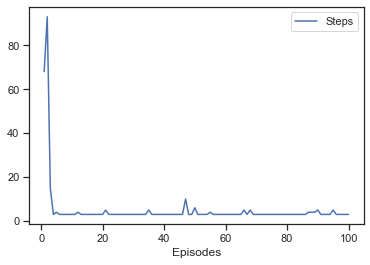

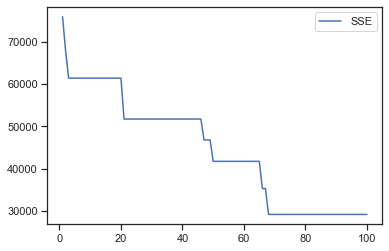

In [173]:
# Deterministic In class example
aRewards = [[2, 0, 100]]
aTerminals = [[2, 0]]

grid = setupGrid(3, 2, aRewards, aTerminals, None, None)
player = Player(grid, [0, 1])
qlearn = QLearn(0.9, None, True)

itersTruth = [50, 60, 70]
grid.determineQtruth(itersTruth, False, False, 'ql')

iters = 100

grid.reset_showboard()
player = Player(grid, [0, 1])
charts = Charts(iters)

print(grid.show_board)

run(False, iters, None, 0.1, False, 'ql')
print(player.qtable)
print(grid.show_board)

player.detPolicyV()


plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
plt.figure()
g2 = sns.lineplot(data=charts.sse)

0 10 20 30 40 0 10 20 30 40 50 Diff is 0.02
CONVERGENCE!!!
qtruth
                          0                             1  \
0      [0, 42.59, 42.59, 0]      [0, 48.44, 48.44, 37.33]   
1  [37.33, 48.44, 48.44, 0]  [42.59, 54.94, 54.94, 42.59]   
2  [42.59, 54.94, 54.94, 0]  [48.44, 62.16, 62.16, 48.44]   
3  [48.44, 62.16, 62.16, 0]  [54.94, 70.18, 70.18, 54.94]   
4      [54.94, 70.18, 0, 0]       [62.16, 79.1, 0, 62.16]   

                              2                             3  \
0      [0, 54.94, 54.94, 42.59]      [0, 62.16, 62.16, 48.44]   
1  [48.44, 62.16, 62.16, 48.44]  [54.94, 70.18, 70.18, 54.94]   
2  [54.94, 70.18, 70.18, 54.94]    [62.16, 79.1, 79.1, 62.16]   
3    [62.16, 79.1, 79.1, 62.16]    [70.18, 89.0, 89.0, 70.18]   
4       [70.18, 89.0, 0, 70.18]        [79.1, 100.0, 0, 79.1]   

                         4  
0     [0, 0, 70.18, 54.94]  
1  [62.16, 0, 79.1, 62.16]  
2  [70.18, 0, 89.0, 70.18]  
3   [79.1, 0, 100.0, 79.1]  
4             [0, 0, 0, 0]  
  

[(0.0, 338089.95)]

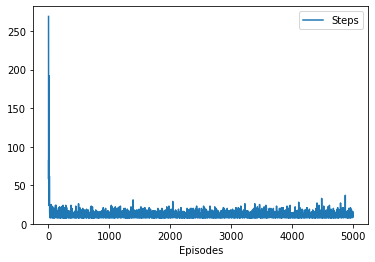

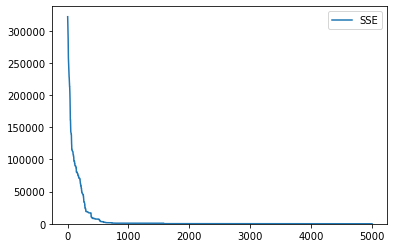

In [105]:
# finding the ground truth by determining at what level of iteration the diffences in the 
# qtables becoes small enough to conclude ground truth: using that as basis for 
# sum of squared errors calculation.

# QLearning Non-deterministic example
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False, 'ql')

print("qtruth")
print(grid.qtruth)

runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

qlsteps = charts.stepsGoal[:]
qlsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=qlsteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=qlsse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 False
qtruth
                          0                            1  \
0      [0, 16.87, 21.04, 0]     [0, 20.81, 19.85, 15.32]   
1  [11.22, 17.78, 27.73, 0]  [17.0, 24.14, 14.01, 16.21]   
2  [16.81, 17.73, 18.68, 0]   [14.28, 14.2, 30.7, 23.57]   
3   [7.61, 28.22, 30.02, 0]  [16.29, 29.84, 21.05, 6.85]   
4      [19.87, 56.22, 0, 0]      [29.6, 76.57, 0, -1.69]   

                              2                             3  \
0       [0, 26.99, 21.43, 5.01]      [0, 29.76, 13.48, 13.48]   
1  [18.89, 30.39, 23.79, 24.22]   [16.59, 12.4, 36.18, 20.65]   
2    [19.4, 20.32, 24.0, 22.03]   [31.84, 

[(0.0, 89687.05)]

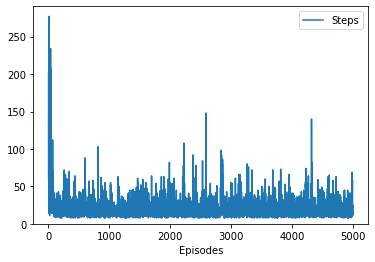

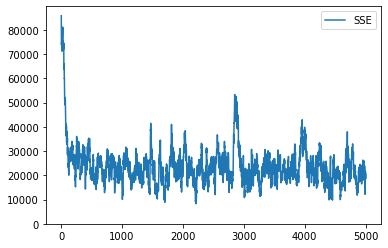

In [143]:
# SARSA
# uses two actions, use action chosen by eps-greedy rather than max action like Qlearning
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)



runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    print(player.qtable)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarsteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=sarsse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 0 10 20 30 40 50 Diff is 0.0
CONVERGENCE!!!
qtruth
                         0                           1  \
0       [0, -1.0, -1.0, 0]     [0, -0.42, -0.42, -1.0]   
1  [-1.0, -0.42, -0.42, 0]    [-1.0, 1.18, 1.18, -1.0]   
2    [-1.0, 1.18, 1.18, 0]  [-0.42, 4.36, 4.36, -0.42]   
3   [-0.42, 4.36, 4.36, 0]  [1.18, 10.74, 10.74, 1.18]   
4      [1.18, 10.74, 0, 0]      [4.36, 23.49, 0, 4.36]   

                            2                           3  \
0       [0, 1.18, 1.18, -1.0]      [0, 4.36, 4.36, -0.42]   
1  [-0.42, 4.36, 4.36, -0.42]  [1.18, 10.74, 10.74, 1.18]   
2  [1.18, 10.74, 10.74, 1.18]  [4.36, 23.49, 23.49, 4.36]   
3  [4.36, 23.49, 23.49, 4.36]  [10.74, 49.0, 49.0, 10.74]   
4     [10.74, 49.0, 0, 10.74]    [23.49, 100.0, 0, 23.49]   

                          4  
0       [0, 0, 10.74, 1.18]  
1    [4.36, 0, 23.49, 4.36]  
2   [10.74, 0, 49.0, 10.74]  
3  [23.49, 0, 100.0, 23.49]  
4              [0, 0, 0, 0]  
   0  1  2  3  4
0  *  .  .  .  .
1  . 

[(0.0, 31359.45)]

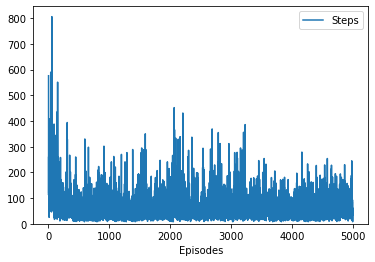

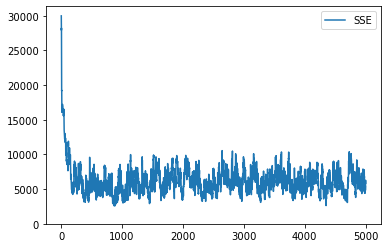

In [110]:
# SARSA
# uses two actions, use action chosen by eps-greedy rather than max action like Qlearning
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.5, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)



runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    player.detPolicyV()

    print(player.qtable)

    print(player.policy)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarsteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=sarsse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 0 10 20 30 40 50                           0                             1  \
0      [0, -0.96, -0.96, 0]      [0, -0.96, -1.05, -0.96]   
1  [-0.96, -1.05, -0.96, 0]  [-0.96, -1.05, -1.05, -0.96]   
2  [-0.96, -1.05, -0.96, 0]  [-1.05, -1.06, -1.05, -0.96]   
3  [-0.96, -1.05, -0.96, 0]  [-1.05, -1.01, -0.96, -0.96]   
4      [-0.96, -0.96, 0, 0]      [-1.05, -0.15, 0, -0.96]   

                              2                             3  \
0      [0, -0.96, -1.05, -0.96]      [0, -0.96, -1.05, -0.96]   
1  [-0.96, -1.05, -1.06, -1.05]  [-0.96, -0.96, -1.02, -1.05]   
2  [-1.05, -1.02, -1.01, -1.05]  [-1.05, -0.16, -0.15, -1.06]   
3  [-1.06, -0.15, -0.15, -1.05]    [-1.01, 8.83, 8.92, -0.99]   
4       [-1.01, 8.94, 0, -0.96]      [-0.15, 99.86, 0, -0.15]   

                          4  
0      [0, 0, -0.96, -0.96]  
1  [-0.96, 0, -0.16, -1.05]  
2    [-0.96, 0, 8.84, -1.0]  
3  [-0.16, 0, 99.37, -0.15]  
4              [0, 0, 0, 0]  
                    0          

[(0.0, 19361.7)]

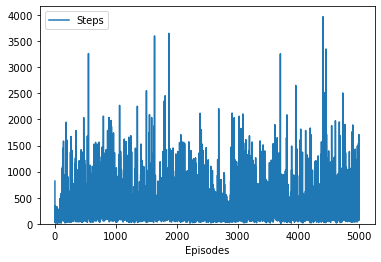

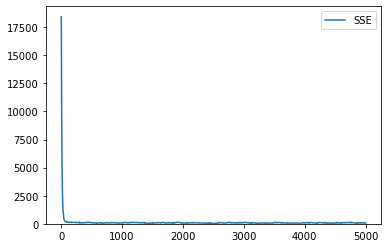

In [89]:
# SARSA
# uses two actions, use action chosen by eps-greedy rather than max action like Qlearning
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.1, 0.1, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)



runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    player.detPolicyV()

    print(player.qtable)

    print(player.policy)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarsteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=sarsse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 0 10 20 30 40 50                          0                           1  \
0       [0, -1.0, -1.0, 0]     [0, -0.42, -0.42, -1.0]   
1  [-1.0, -0.42, -0.42, 0]    [-1.0, 1.18, 1.18, -1.0]   
2    [-1.0, 1.18, 1.18, 0]  [-0.42, 4.36, 4.36, -0.42]   
3   [-0.42, 4.36, 4.36, 0]  [1.18, 10.74, 10.74, 1.18]   
4      [1.18, 10.74, 0, 0]      [4.36, 23.49, 0, 4.36]   

                            2                           3  \
0       [0, 1.18, 1.18, -1.0]      [0, 4.36, 4.36, -0.42]   
1  [-0.42, 4.36, 4.36, -0.42]  [1.18, 10.74, 10.74, 1.18]   
2  [1.18, 10.74, 10.74, 1.18]  [4.36, 23.49, 23.49, 4.36]   
3  [4.36, 23.49, 23.49, 4.36]  [10.74, 49.0, 49.0, 10.74]   
4     [10.74, 49.0, 0, 10.74]    [23.49, 100.0, 0, 23.49]   

                          4  
0       [0, 0, 10.74, 1.18]  
1    [4.36, 0, 23.49, 4.36]  
2   [10.74, 0, 49.0, 10.74]  
3  [23.49, 0, 100.0, 23.49]  
4              [0, 0, 0, 0]  
                    0                     1                     2  \
0   

[(0.0, 31485.85)]

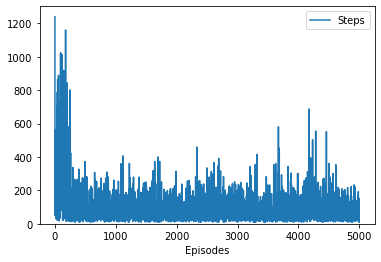

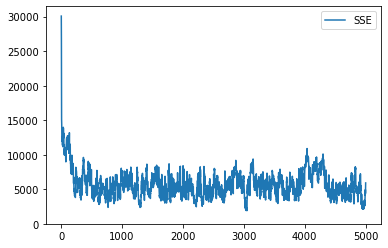

In [78]:
# SARSA
# uses two actions, use action chosen by eps-greedy rather than max action like Qlearning
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.5, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)



runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.2/(i+1), False, 'sarsa')

    print(grid.show_board)

    player.detPolicyV()

    print(player.qtable)

    print(player.policy)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarsteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=sarsse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 0 10 20 30 40 50                          0                           1  \
0       [0, 5.14, 5.14, 0]       [0, 8.79, 8.79, 2.59]   
1    [2.59, 8.79, 8.79, 0]    [5.14, 14.0, 14.0, 5.14]   
2    [5.14, 14.0, 14.0, 0]  [8.79, 21.44, 21.44, 8.79]   
3  [8.79, 21.44, 21.44, 0]  [14.0, 32.08, 32.08, 14.0]   
4      [14.0, 32.08, 0, 0]    [21.44, 47.27, 0, 21.44]   

                              2                             3  \
0         [0, 14.0, 14.0, 5.14]       [0, 21.44, 21.44, 8.79]   
1    [8.79, 21.44, 21.44, 8.79]    [14.0, 32.08, 32.08, 14.0]   
2    [14.0, 32.08, 32.08, 14.0]  [21.44, 47.27, 47.27, 21.44]   
3  [21.44, 47.27, 47.27, 21.44]  [32.08, 68.98, 68.98, 32.08]   
4      [32.08, 68.98, 0, 32.08]      [47.27, 99.99, 0, 47.27]   

                          4  
0       [0, 0, 32.08, 14.0]  
1  [21.44, 0, 47.27, 21.44]  
2  [32.08, 0, 68.98, 32.08]  
3  [47.27, 0, 99.99, 47.27]  
4              [0, 0, 0, 0]  
                       0                         

[(0.0, 86130.65)]

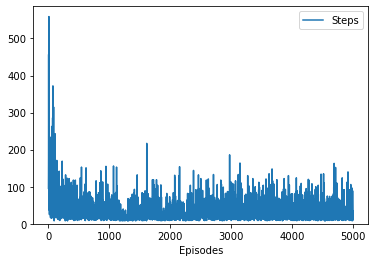

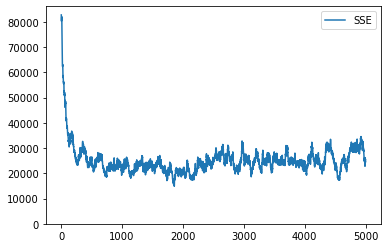

In [93]:
# SARSA
# uses two actions, use action chosen by eps-greedy rather than max action like Qlearning
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.7, 0.3, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)



runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    player.detPolicyV()

    print(player.qtable)

    print(player.policy)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarsteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=sarsse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 0 10 20 30 40 50                        0                          1  \
0     [0, -1.0, -1.0, 0]      [0, -1.0, -1.1, -1.0]   
1  [-1.0, -1.1, -1.0, 0]   [-1.0, -1.1, -1.1, -1.0]   
2  [-1.0, -1.1, -1.0, 0]   [-1.1, -1.1, -1.1, -1.0]   
3  [-1.0, -1.1, -1.0, 0]  [-1.1, -1.01, -1.0, -1.0]   
4     [-1.0, -1.0, 0, 0]      [-1.1, -0.1, 0, -1.0]   

                            2                          3  \
0       [0, -1.0, -1.1, -1.0]      [0, -1.0, -1.1, -1.0]   
1    [-1.0, -1.1, -1.1, -1.1]  [-1.0, -1.0, -1.01, -1.1]   
2  [-1.1, -1.01, -1.01, -1.1]   [-1.1, -0.1, -0.1, -1.1]   
3    [-1.1, -0.1, -0.1, -1.1]   [-1.01, 9.0, 9.0, -1.01]   
4       [-1.01, 9.0, 0, -1.0]     [-0.1, 100.0, 0, -0.1]   

                        4  
0      [0, 0, -1.0, -1.0]  
1   [-1.0, 0, -0.1, -1.1]  
2   [-1.0, 0, 9.0, -1.01]  
3  [-0.1, 0, 100.0, -0.1]  
4            [0, 0, 0, 0]  
                    0                     1                     2  \
0    [0, 0.0, 0.0, 0]    [0, 0.0, 0.0, 0

[(0.0, 11031.15)]

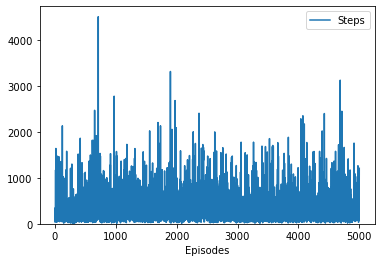

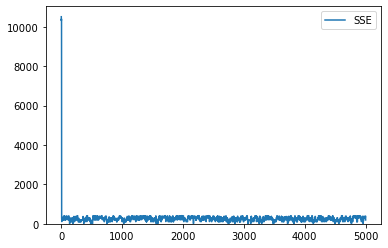

In [98]:
# SARSA
# uses two actions, use action chosen by eps-greedy rather than max action like Qlearning
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.1, 0.9, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)



runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    charts = Charts(runiters[i])

    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    player.detPolicyV()

    print(player.qtable)

    print(player.policy)

sarsteps = charts.stepsGoal[:]
sarsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=sarsteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=sarsse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 Diff is 0.0
CONVERGENCE!!!
in there
vtruth
       0      1      2       3       4
0  42.59  48.44  54.94   62.16   70.18
1  48.44  54.94  62.16   70.18   79.10
2  54.94  62.16  70.18   79.10   89.00
3  62.16  70.18  79.10   89.00  100.00
4  70.18  79.10  89.00  100.00    0.00
   0  1  2  3  4
0  *  .  .  .  .
1  .  .  .  .  .
2  .  .  .  .  .
3  .  .  .  .  .
4  .  .  .  .  .
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260

[(0.0, 123230.75)]

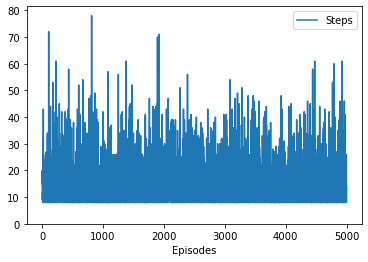

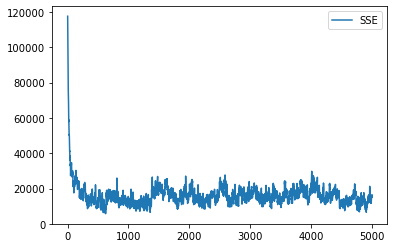

In [129]:
# TD prediction
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100

itersTruth = [100, 200, 500, 900]

grid.determineQtruth(itersTruth, True, False, 'td')

print("vtruth")
print(grid.vtruth)

p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
policy = pd.DataFrame(p)


runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])
    print(grid.show_board)

    player.policy = policy
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'td')

    print(grid.show_board)
    print(player.policy)

    print(player.vtable)

tdsteps = charts.stepsGoal[:]
tdsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=charts.sse)
g2.set(ylim=(0,None))



0 10 20 30 40 0 10 20 30 40 50 Diff is 0.0
CONVERGENCE!!!
qtruth
                          0                             1  \
0      [0, 42.59, 42.59, 0]          [0, 0, 48.44, 37.33]   
1  [37.33, 48.44, 48.44, 0]      [42.59, 0, 54.94, 42.59]   
2  [42.59, 54.94, 42.59, 0]  [48.44, 62.16, 48.44, 48.44]   
3  [48.44, 48.44, 37.33, 0]      [54.94, 0, 42.59, 42.59]   
4      [42.59, 42.59, 0, 0]          [48.44, 0, 0, 37.33]   

                      2                           3                        4  
0          [0, 0, 0, 0]        [0, 62.16, 62.16, 0]     [0, 0, 70.18, 54.94]  
1          [0, 0, 0, 0]    [54.94, 70.18, 70.18, 0]  [62.16, 0, 79.1, 62.16]  
2  [0, 70.18, 0, 54.94]  [62.16, 79.1, 79.1, 62.16]  [70.18, 0, 89.0, 70.18]  
3          [0, 0, 0, 0]      [70.18, 89.0, 89.0, 0]   [79.1, 0, 100.0, 79.1]  
4          [0, 0, 0, 0]         [79.1, 100.0, 0, 0]             [0, 0, 0, 0]  
   0  1  2  3  4
0  *  .  X  .  .
1  .  .  X  .  .
2  .  .  .  .  .
3  .  .  X  .  .
4  .  .  

[(0.0, 212367.15)]

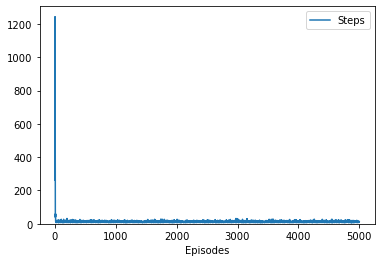

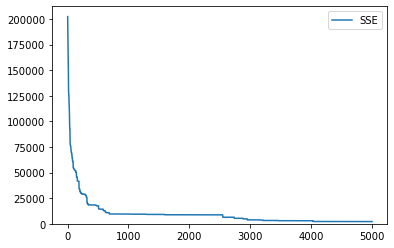

In [130]:
# QLearning Non-deterministic example with walls and one opening
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2,0], [2, 1], [2, 3], [2, 4]])
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [50, 60, 70, 80]
grid.determineQtruth(itersTruth, False, False, 'ql')

print("qtruth")
print(grid.qtruth)

runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)
    print(player.qtable)

qlwsteps = charts.stepsGoal[:]
qlwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=charts.sse)
g2.set(ylim=(0,None))

    

    


0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 False
qtruth
                          0                            1                    2  \
0       [0, -1.0, -5.62, 0]          [0, 0, -3.0, -1.03]         [0, 0, 0, 0]   
1     [-5.47, 2.02, 2.6, 0]     [-2.73, 0, 10.78, -3.65]         [0, 0, 0, 0]   
2  [-3.51, 24.04, -4.01, 0]  [-1.25, 29.17, -1.02, 6.31]  [0, 29.25, 0, 17.3]   
3   [-1.0, -6.68, -1.22, 0]      [13.28, 0, -1.0, -6.64]         [0, 0, 0, 0]   
4       [-2.31, -1.0, 0, 0]          [-1.0, 0, 0, -1.87]         [0, 0, 0, 0]   

                          3                         4  
0      [0, -0.99, -2.92, 0]      [0, 0, 56.04, -0.06]  

[(0.0, 55066.1)]

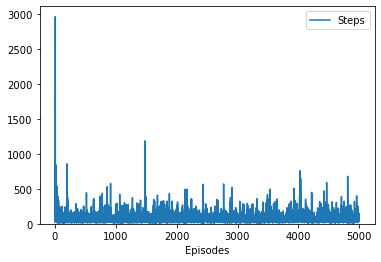

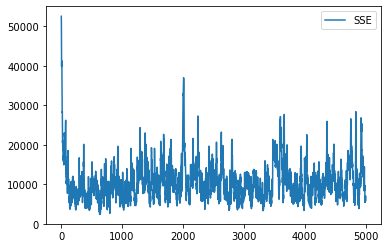

In [144]:
# SARSA with wall with one opening
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 0], [2, 1], [2, 3], [2, 4]])
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)

runiters = [5000]
for i in range(0, len(runiters)):

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)

    print(player.qtable)


sarwsteps = charts.stepsGoal[:]
sarwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=charts.sse)
g2.set(ylim=(0,None))


    

    


0 10 20 30 40 50 60 70 80 90 0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 Diff is 0.0
CONVERGENCE!!!
in there
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 19

[(0.0, 90034.45)]

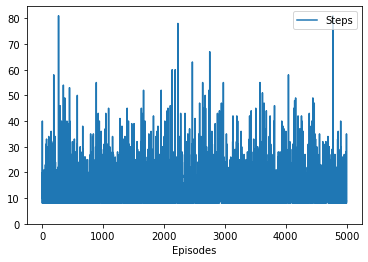

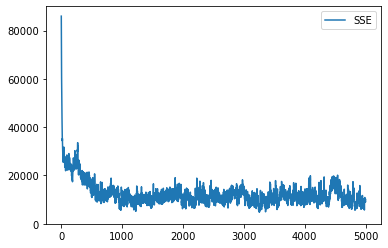

In [145]:
# TD prediction with walls and one opening
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, None, None)
grid.set_walls([[2, 0], [2, 1], [2, 3], [2, 4]])
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100

itersTruth = [100, 200, 500, 1000]

grid.determineQtruth(itersTruth, True, False, 'td')

runiters = [5000]
for i in range(0, len(runiters)):

    p = [['S', 'E', 'E', 'E', 'S'], ['E', 'S', 'S', 'S', 'W'], ['N', 'E', 'E', 'S', 'S'], ['N', 'W', 'W', 'E', 'S'], ['N', 'W', 'W', 'E', 'N']]
    policy = pd.DataFrame(p)
    #print(policy)

    grid.reset_showboard()
    player = Player(grid, [0, 0])

    player.policy = policy
    #print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'td')

    print(grid.show_board)
    print(player.vtable)


tdwsteps = charts.stepsGoal[:]
tdwsse = charts.sse[:]

plt.figure()
g1 = sns.lineplot(data=charts.stepsGoal)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=charts.sse)
g2.set(ylim=(0,None))



[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 False
qtruth
                          0                            1  \
0      [0, 21.03, 21.52, 0]         [0, 0, 24.14, 19.95]   
1  [19.41, 24.41, 22.53, 0]     [21.56, 0, 27.71, 22.32]   
2  [21.56, 22.02, 25.33, 0]  [24.31, 31.08, 23.21, 25.2]   
3  [23.56, 21.54, 24.83, 0]     [22.94, 0, 21.58, 23.05]   
4      [25.11, 21.95, 0, 0]         [21.86, 0, 0, 24.62]   

                      2   

[(0.0, 165662.65)]

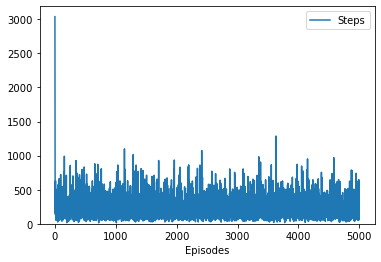

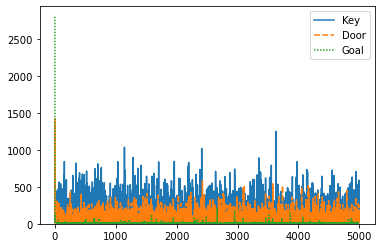

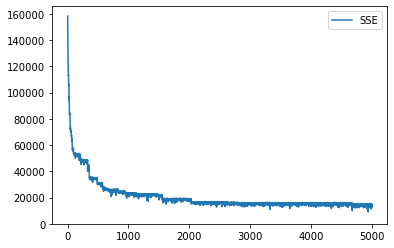

In [149]:
# QLearning Non-deterministic example with walls and with key and door
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True, 'ql')

print("qtruth")
print(grid.qtruth)

runiters = [5000]
for i in range(0, len(runiters)):

    player = Player(grid, [0, 0])
    charts = Charts(runiters[i])
    print(grid.show_board)

    run(False, runiters[i], None, 0.3, False, 'ql')

    print(grid.show_board)

    print(charts.stepsKey)

qlkeysteps = charts.stepsGoal[:]
qlkeysse = charts.sse[:]
qlkey = charts.stepsKey[:]

plt.figure()
g1 = sns.lineplot(data=qlkeysteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=qlkey)
g2.set(ylim=(0,None))
plt.figure()
g3 = sns.lineplot(data=qlkeysse)
g3.set(ylim=(0,None))

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 False
qtruth
                         0                            1                    2  \
0      [0, -1.0, -3.36, 0]           [0, 0, -1.9, -1.0]         [0, 0, 0, 0]   
1   [-1.0, -4.17, -1.0, 0]       [-1.0, 0, -1.1, -7.43]         [0, 0, 0, 0]   
2  [-1.02, -6.68, -1.0, 0]  [-1.0, 15.07, -3.07, -6.77]  [0, 27.99, 0, 4.74]   
3   [-1.0, -3.13, -1.0, 0]      [0.93, 0, -1.85, -3.26]         [0,

[(0.0, 39443.95)]

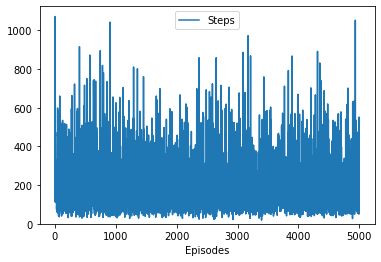

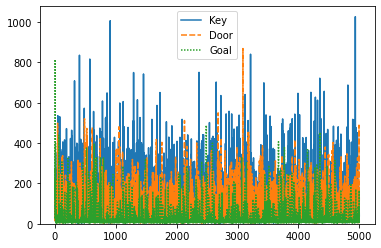

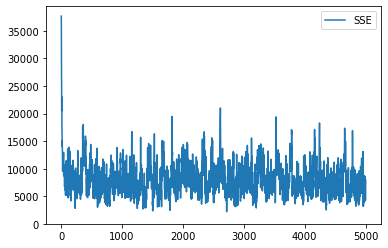

In [150]:
# SARSA with wall with door, key
# predefined policy, not optimal
aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, 0.5, False)

itersTruth = [1000]
grid.determineQtruth(itersTruth, False, True, 'sarsa')

print("qtruth")
print(grid.qtruth)

runiters = [5000]
for i in range(0, len(runiters)):
    player = Player(grid, [0, 0])

    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'sarsa')

    print(grid.show_board)


sarkeysteps = charts.stepsGoal[:]
sarkeysse = charts.sse[:]
sarkey = charts.stepsKey[:]

plt.figure()
g1 = sns.lineplot(data=sarkeysteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=sarkey)
g2.set(ylim=(0,None))
plt.figure()
g3 = sns.lineplot(data=sarkeysse)
g3.set(ylim=(0,None))


    

    

    

    


[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4]]
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 True
in there
vtruth
       0      1      2       3       4
0  42.24  48.34   0.00   62.16   70.18
1  48.30  54.94   0.00   70.18   79.10
2  54.87  62.16  70.18   79.10   89.00
3  48.33  54.93   0.00   89.00  100.00
4  42.48  48.40   0.00  100.00    0.00
   0  1  2  3  4
0  S  W  X  S  S
1  S  W  X  S  S
2  S  E  E  E  S
3  S  N  X  E  S
4  E  N  X  E  N
   0  1  2  3  4
0  S  W  X  S  S
1  S  W  

[(0.0, 90142.0)]

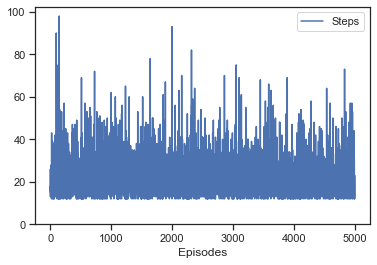

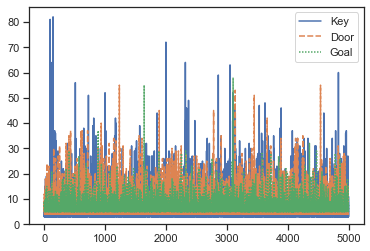

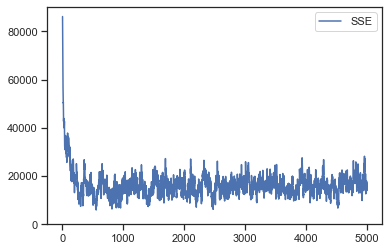

In [168]:
# TD prediction with walls, key, door
# Use the V table instead of the Q table, V table is updated on each iteration based on reward location

aRewards = [[4, 4, 100]]
aTerminals = [[4, 4]]

grid = setupGrid(5, 5, aRewards, aTerminals, [0, 4], [2, 2])
grid.set_walls([[2, 0], [2, 1], [2, 2], [2, 3], [2, 4]])
print(grid.walls)
qlearn = QLearn(0.9, 0.5, False)

# Create V table
player.v[4][4] = 100

itersTruth = [1000]

grid.determineQtruth(itersTruth, True, True, 'td')

print("vtruth")
print(grid.vtruth)


runiters = [5000]
for i in range(0, len(runiters)):
    p = [['S', 'W', 'X', 'S', 'S'], ['S', 'W', 'X', 'S', 'S'], ['S', 'E', 'E', 'E', 'S'], ['S', 'N', 'X', 'E', 'S'], ['E', 'N', 'X', 'E', 'N']]
    policy = pd.DataFrame(p)
    print(policy)

    player = Player(grid, [0, 0])
    player.policy = policy
    print(player.policy)
    charts = Charts(runiters[i])

    run(False, runiters[i], None, 0.3, False, 'td')

    print(grid.show_board)
    print(player.vtable)

tdkeysteps = charts.stepsGoal[:]
tdkeysse = charts.sse[:]
tdkey = charts.stepsKey

plt.figure()
g1 = sns.lineplot(data=tdkeysteps)
g1.set(ylim=(0,None))
plt.figure()
g2 = sns.lineplot(data=tdkey)
g2.set(ylim=(0,None))
plt.figure()
g3 = sns.lineplot(data=tdkeysse)
g3.set(ylim=(0,None))



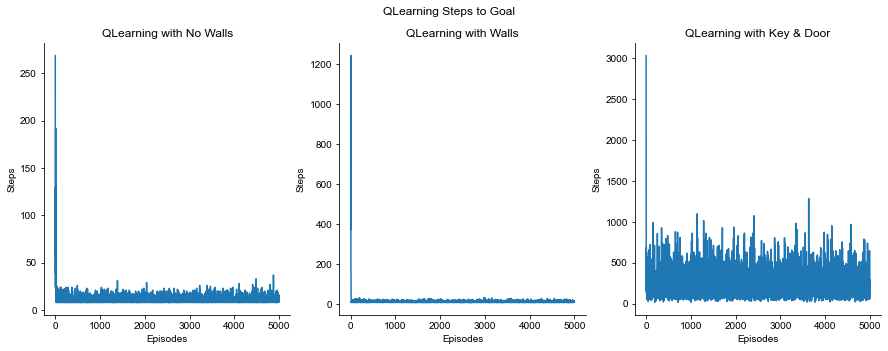

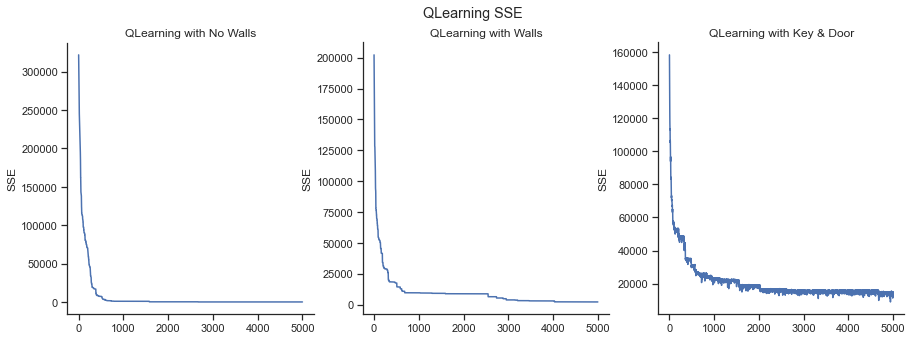

In [152]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('QLearning Steps to Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("QLearning with No Walls")
ax2.set_title("QLearning with Walls")
ax3.set_title("QLearning with Key & Door")

sns.lineplot(x=qlsteps.index, y='Steps', data=qlsteps, ax=ax1)
sns.lineplot(x=qlsteps.index, y='Steps', data=qlwsteps, ax=ax2)
sns.lineplot(x=qlsteps.index, y='Steps', data=qlkeysteps, ax=ax3)

plt.show()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('QLearning SSE')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("QLearning with No Walls")
ax2.set_title("QLearning with Walls")
ax3.set_title("QLearning with Key & Door")

sns.lineplot(x=qlsse.index, y='SSE', data=qlsse, ax=ax1)
sns.lineplot(x=qlwsse.index, y='SSE', data=qlwsse, ax=ax2)
sns.lineplot(x=qlkeysse.index, y='SSE', data=qlkeysse, ax=ax3)

plt.show()

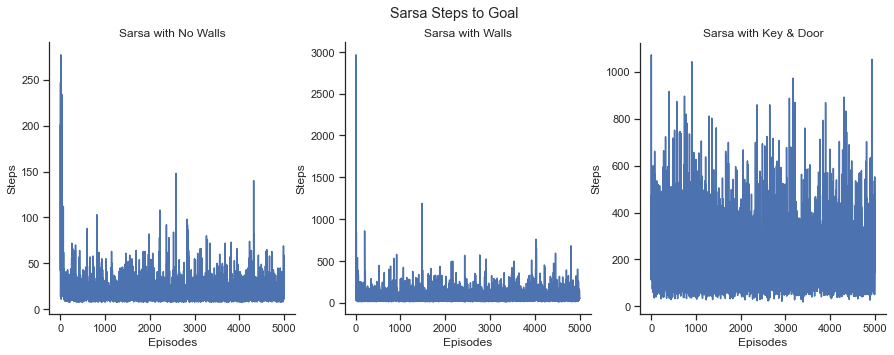

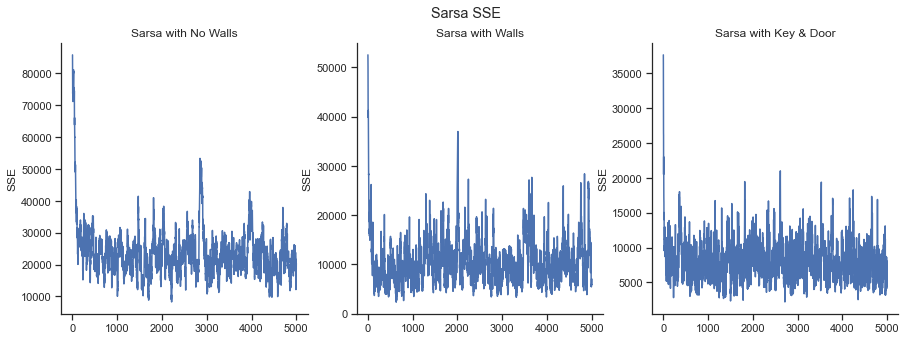

In [153]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('Sarsa Steps to Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("Sarsa with No Walls")
ax2.set_title("Sarsa with Walls")
ax3.set_title("Sarsa with Key & Door")

sns.lineplot(x=sarsteps.index, y='Steps', data=sarsteps, ax=ax1)
sns.lineplot(x=sarwsteps.index, y='Steps', data=sarwsteps, ax=ax2)
sns.lineplot(x=sarkeysteps.index, y='Steps', data=sarkeysteps, ax=ax3)

plt.show()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('Sarsa SSE')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("Sarsa with No Walls")
ax2.set_title("Sarsa with Walls")
ax3.set_title("Sarsa with Key & Door")

sns.lineplot(x=sarsse.index, y='SSE', data=sarsse, ax=ax1)
sns.lineplot(x=sarwsse.index, y='SSE', data=sarwsse, ax=ax2)
sns.lineplot(x=sarkeysse.index, y='SSE', data=sarkeysse, ax=ax3)

plt.show()

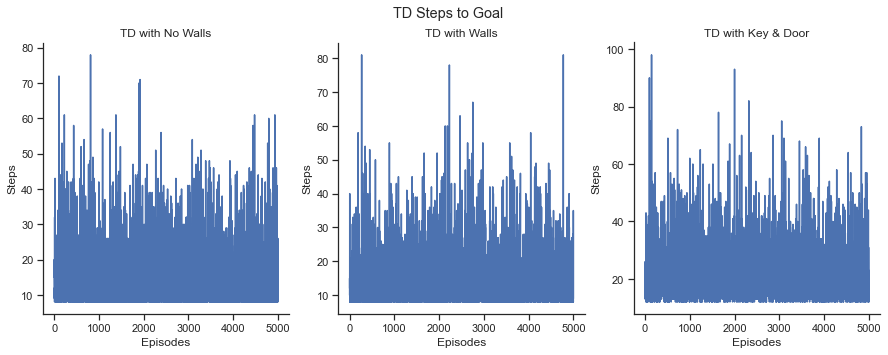

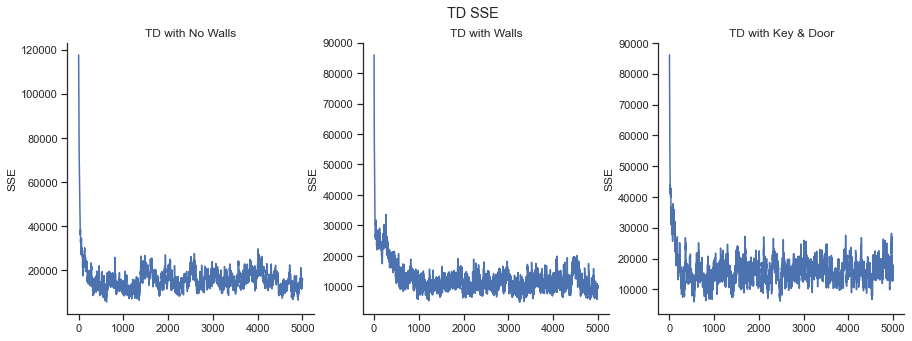

In [169]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('TD Steps to Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("TD with No Walls")
ax2.set_title("TD with Walls")
ax3.set_title("TD with Key & Door")

sns.lineplot(x=tdsteps.index, y='Steps', data=tdsteps, ax=ax1)
sns.lineplot(x=tdwsteps.index, y='Steps', data=tdwsteps, ax=ax2)
sns.lineplot(x=tdkeysteps.index, y='Steps', data=tdkeysteps, ax=ax3)

plt.show()

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('TD SSE')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("TD with No Walls")
ax2.set_title("TD with Walls")
ax3.set_title("TD with Key & Door")

sns.lineplot(x=tdsse.index, y='SSE', data=tdsse, ax=ax1)
sns.lineplot(x=tdwsse.index, y='SSE', data=tdwsse, ax=ax2)
sns.lineplot(x=tdkeysse.index, y='SSE', data=tdkeysse, ax=ax3)

plt.show()

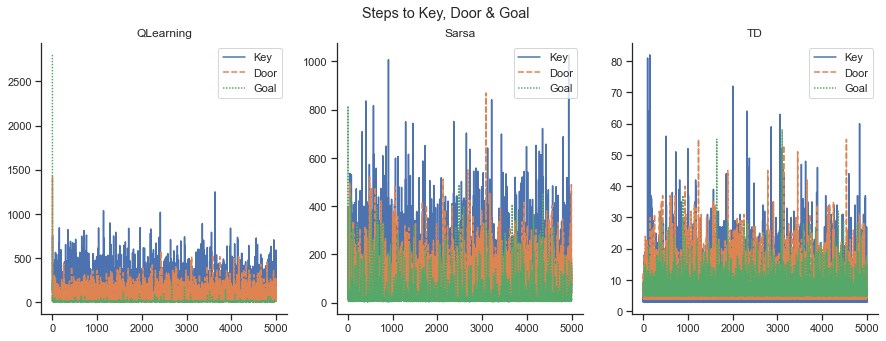

In [170]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))
fig.suptitle('Steps to Key, Door & Goal')
ax1, ax2, ax3 = axes.ravel()
sns.set(style="ticks")
sns.despine(fig=fig)

ax1.set_title("QLearning")
ax2.set_title("Sarsa")
ax3.set_title("TD")

sns.lineplot(data=qlkey, ax=ax1)
sns.lineplot(data=sarkey, ax=ax2)
sns.lineplot(data=tdkey, ax=ax3)

plt.show()



In [156]:
print(qlsteps)
print(qlsse)

print(qlsteps.describe())
print(qlsse.describe())

          Steps
Episodes       
1           269
2            58
3            83
4            67
5            24
...         ...
4996         12
4997         16
4998         10
4999         10
5000          9

[5000 rows x 1 columns]
         SSE
1     321993
2     317713
3     314319
4     307205
5     303475
...      ...
4996      54
4997      54
4998      54
4999      54
5000      54

[5000 rows x 1 columns]
             Steps
count  5000.000000
mean     11.510200
std       6.159341
min       8.000000
25%       9.000000
50%      10.000000
75%      13.000000
max     269.000000
                 SSE
count    5000.000000
mean     6889.653400
std     28963.102952
min        54.000000
25%        54.000000
50%       219.000000
75%       917.000000
max    321993.000000


In [157]:
print(qlwsteps)
print(qlwsse)

print(qlwsteps.describe())
print(qlwsse.describe())

          Steps
Episodes       
1           371
2           749
3          1244
4           261
5           797
...         ...
4996         11
4997         11
4998         11
4999         10
5000         13

[5000 rows x 1 columns]
         SSE
1     202358
2     196863
3     191696
4     187265
5     179152
...      ...
4996    2175
4997    2175
4998    2175
4999    2175
5000    2175

[5000 rows x 1 columns]
             Steps
count  5000.000000
mean     12.624400
std      24.480588
min       8.000000
25%       9.000000
50%      11.000000
75%      14.000000
max    1244.000000
                 SSE
count    5000.000000
mean     9557.921600
std     15038.858548
min      2175.000000
25%      2980.000000
50%      8746.000000
75%      9366.000000
max    202358.000000


In [158]:
print(qlkey)
print(qlkeysteps)
print(qlkeysse)
# 50% is the median
print(qlkey.describe())
print(qlkeysteps.describe())
print(qlkeysse.describe())


      Key  Door  Goal
1     224    14  2800
2     655  1001    12
3     128  1421   128
4     755    15    56
5     317     9    22
...   ...   ...   ...
4996   31   257     7
4997  129   124     5
4998   89    56     7
4999   54    86    10
5000  125   141     7

[5000 rows x 3 columns]
          Steps
Episodes       
1          3038
2          1668
3          1677
4           826
5           348
...         ...
4996        295
4997        258
4998        152
4999        150
5000        273

[5000 rows x 1 columns]
         SSE
1     158201
2     150764
3     145525
4     140105
5     135804
...      ...
4996   14672
4997   14642
4998   14404
4999   14143
5000   14600

[5000 rows x 1 columns]
               Key         Door         Goal
count  5000.000000  5000.000000  5000.000000
mean    149.863000    74.646600     8.049000
std     132.905262    71.203745    40.187904
min       3.000000     4.000000     5.000000
25%      57.000000    28.000000     5.000000
50%     110.000000    54.00

In [159]:
print(sarsteps)
print(sarsse)

print(sarsteps.describe())
print(sarsse.describe())

          Steps
Episodes       
1           201
2            60
3            59
4           144
5            42
...         ...
4996         11
4997         18
4998         25
4999         24
5000         22

[5000 rows x 1 columns]
        SSE
1     85811
2     79065
3     74330
4     73752
5     73709
...     ...
4996  21650
4997  19664
4998  20697
4999  18582
5000  20464

[5000 rows x 1 columns]
             Steps
count  5000.000000
mean     20.265400
std      14.092774
min       8.000000
25%      13.000000
50%      17.000000
75%      24.000000
max     277.000000
                SSE
count   5000.000000
mean   23583.591200
std     8089.248002
min     8290.000000
25%    19134.750000
50%    22462.500000
75%    26167.000000
max    85811.000000


In [160]:
print(sarwsteps)
print(sarwsse)

print(sarwsteps.describe())
print(sarwsse.describe())

          Steps
Episodes       
1           151
2           300
3           610
4           880
5           681
...         ...
4996         37
4997         68
4998        145
4999         45
5000         62

[5000 rows x 1 columns]
        SSE
1     52557
2     51034
3     50160
4     42983
5     43018
...     ...
4996   6059
4997   6231
4998   7076
4999   6899
5000   5898

[5000 rows x 1 columns]
             Steps
count  5000.000000
mean     81.593000
std      87.791444
min       8.000000
25%      33.000000
50%      58.000000
75%     101.000000
max    2965.000000
                SSE
count   5000.000000
mean   10450.692200
std     4734.205315
min     2375.000000
25%     7177.000000
50%     9579.500000
75%    12411.250000
max    52557.000000


In [161]:
print(sarkey)
print(sarkeysteps)
print(sarkeysse)

# 50% is the median
print(sarkey.describe())
print(sarkeysteps.describe())
print(sarkeysse.describe())

      Key  Door  Goal
1     104    14   265
2      26    17   276
3      49    26    38
4      45    47    25
5     212    45   815
...   ...   ...   ...
4996  147    29     6
4997   93   179   165
4998  116    95     8
4999   96    69    12
5000   40   130     9

[5000 rows x 3 columns]
          Steps
Episodes       
1           383
2           319
3           113
4           117
5          1072
...         ...
4996        182
4997        437
4998        219
4999        177
5000        179

[5000 rows x 1 columns]
        SSE
1     37670
2     36275
3     28782
4     28356
5     26466
...     ...
4996   6428
4997   8058
4998   6296
4999   5279
5000   4443

[5000 rows x 1 columns]
              Key         Door         Goal
count  5000.00000  5000.000000  5000.000000
mean    113.05600    68.851200    20.794200
std     107.72782    67.709488    41.585013
min       3.00000     4.000000     5.000000
25%      41.00000    24.000000     7.000000
50%      79.00000    46.000000    10.000000
7

In [162]:
print(tdsteps)
print(tdsse)

print(tdsteps.describe())
print(tdsse.describe())

          Steps
Episodes       
1            15
2            20
3            14
4            11
5             9
...         ...
4996         15
4997         26
4998          8
4999          9
5000         14

[5000 rows x 1 columns]
         SSE
1     117635
2     112651
3     107127
4     103010
5      95127
...      ...
4996   15959
4997   14932
4998   15628
4999   16464
5000   16009

[5000 rows x 1 columns]
             Steps
count  5000.000000
mean     14.645000
std       7.883413
min       8.000000
25%      10.000000
50%      12.000000
75%      17.000000
max      78.000000
                 SSE
count    5000.000000
mean    15728.347200
std      6303.390948
min      5720.000000
25%     12333.500000
50%     14983.500000
75%     17880.250000
max    117635.000000


In [163]:
print(tdwsteps)
print(tdwsse)

print(tdwsteps.describe())
print(tdwsse.describe())

          Steps
Episodes       
1            10
2            15
3            12
4            40
5             8
...         ...
4996          8
4997          9
4998          8
4999         35
5000          9

[5000 rows x 1 columns]
        SSE
1     85979
2     79088
3     74119
4     70245
5     66393
...     ...
4996  10269
4997  10258
4998   9481
4999   9304
5000   9242

[5000 rows x 1 columns]
             Steps
count  5000.000000
mean     14.145600
std       7.295221
min       8.000000
25%       9.000000
50%      12.000000
75%      16.000000
max      81.000000
                SSE
count   5000.000000
mean   12056.719800
std     5017.619834
min     4870.000000
25%     9290.250000
50%    10932.500000
75%    13127.500000
max    85979.000000


In [164]:
print(tdkey)
print(tdkeysteps)
print(tdkeysse)

# 50% is the median
print(tdkey.describe())
print(tdkeysteps.describe())
print(tdkeysse.describe())


      Key  Door  Goal
1       5     4     6
2       5    16     5
3       3    23     8
4       3    14     6
5       3     4     5
...   ...   ...   ...
996     5     5     5
997     4     5     5
998     5     4     5
999     4     5     9
1000    3     8     5

[1000 rows x 3 columns]
          Steps
Episodes       
1            15
2            26
3            34
4            23
5            12
...         ...
996          15
997          14
998          14
999          18
1000         16

[1000 rows x 1 columns]
        SSE
1     80396
2     75895
3     71589
4     67137
5     63741
...     ...
996    7677
997    8224
998    8214
999    8589
1000   7193

[1000 rows x 1 columns]
               Key         Door         Goal
count  1000.000000  1000.000000  1000.000000
mean      7.239000     7.635000     7.105000
std       7.578609     5.333688     3.060938
min       3.000000     4.000000     5.000000
25%       3.000000     4.000000     5.000000
50%       5.000000     6.000000     6.0